In [1]:
# Exercise 1 - Student Dataset EDA

In [2]:
from collections import defaultdict
import math
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

In [3]:
stu_data = pd.read_csv("datasets/xAPI-Edu-Data.csv")
stu_data.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [4]:
# Covariance - assumes x and y are of equal size
def cov(x, y):
    total = 0
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    for i in range(x.size):
        total += (x[i] - x_mean) * (y[i] - y_mean)
        
    return total / (x.size - 1)

# Standard Deviation
def std(x):
    mean = np.mean(x)
    total = 0
    for item in x:
        total += ((item - mean)**2) / (x.size - 1)
    
    return math.sqrt(total)


#Pearson Correlation
def pearson_cor(x, y):
    return (cov(x,y) / (std(x) * std(y)))
            

In [12]:
if os.path.exists("Output"):
    print("Path exists")
else:
    print("Path not found, creating directory")
    os.mkdir("Output")
    
if os.path.exists("Output/Tables"):
    print("Path exists")
else:
    print("Path not found, creating directory")
    os.mkdir("Output/Tables")
    
if os.path.exists("Output/Images"):
    print("Path exists")
else:
    print("Path not found, creating directory")
    os.mkdir("Output/Images")

Path exists
Path exists
Path not found, creating directory


In [6]:
# Extract quantitative values for correlation calculations
num_data = stu_data.iloc[:, 9:13]
num_data.head()

# Create correlation matrix using Pearson correlation
length = num_data.shape[1]
cor_matrix = np.zeros([length, length])
for i in range(length):
    for j in range(i, length):
        cor = pearson_cor(num_data.iloc[:, i], num_data.iloc[:, j])
        cor_matrix[i][j] = cor_matrix[j][i] = cor
        
print(cor_matrix)

[[1.         0.69157171 0.64391777 0.33938599]
 [0.69157171 1.         0.59450003 0.24329177]
 [0.64391777 0.59450003 1.         0.41729   ]
 [0.33938599 0.24329177 0.41729    1.        ]]


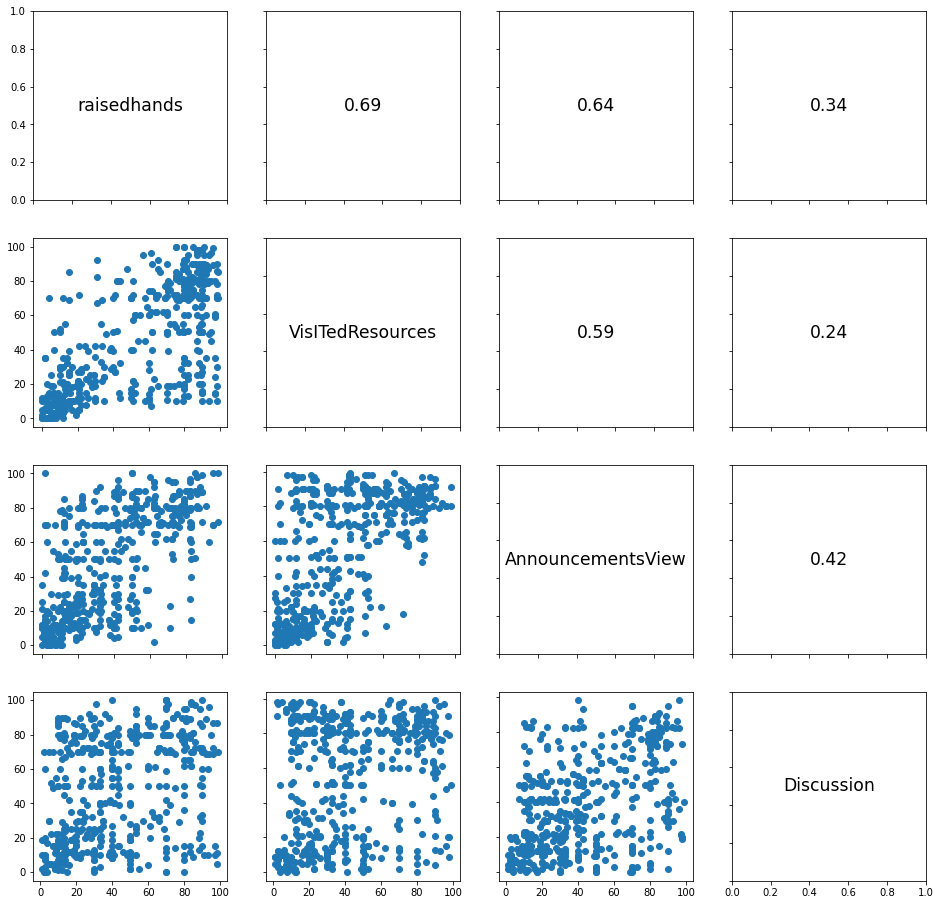

In [7]:
# Draw scatter plots to visualise correlation values
fig, axs = plt.subplots(4, 4, figsize = (16,16))

for i in range(length):
    for j in range(i):
        axs[i,j].scatter(num_data.iloc[:, i], num_data.iloc[:, j])
        
for i in range(length):
    axs[i,i].text(0.5, 0.5, num_data.columns[i], ha='center', va='center', fontsize='xx-large')

for i in range(length):
    for j in range(i + 1, length):
        axs[i,j].text(0.5, 0.5, f'{cor_matrix[i][j]:.2f}', ha='center', va='center', fontsize='xx-large')

for ax in axs.flat:
    ax.label_outer()
    
fig.savefig('Output/draftmansdisplay.png')

In [24]:
# Box plots for when one of the two attributes is qualitative and the other quantitative
def boxplotter(qual_attr, quant_attr, x_name, y_name):
    # An entry in the dictionary corresponds to an axes/box on the box plot
    # defaultdict creates a new list if it comes a cross a new key
    axes = defaultdict(list)
    for qual, quant in zip(qual_attr, quant_attr):
        axes[qual].append(quant)
    
    # Extract lists from dictionary for input into matplotlib boxplot function
    # Also retrieve labels for x axis
    data = []
    labels = []
    for key, item in axes.items():
        labels.append(key)
        data.append(item)
        
    # Make figure wider if there are many boxes in one plot
    if len(axes) > 5:
        plt.figure(figsize=(12, 4))
        
    # Plot data
    plt.boxplot(data)
    plt.xticks(np.arange(1, len(labels) + 1), labels)
    plt.xlabel(x_name)
    plt.ylabel(y_name)
    
    save_path = 'Output/Images/' + y_name + x_name +'.png'
    plt.savefig(save_path)
    plt.show()

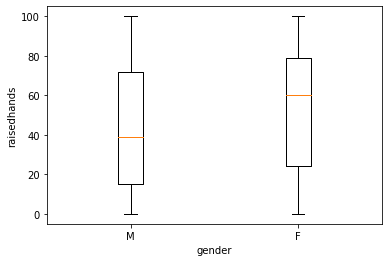

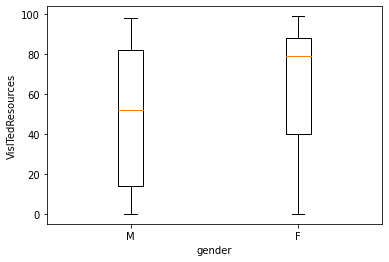

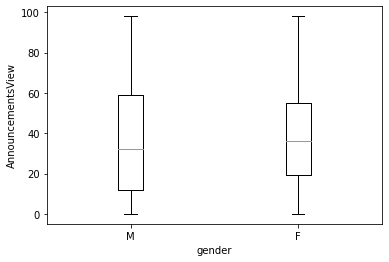

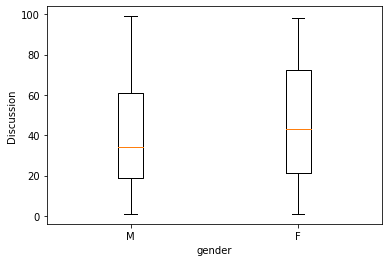

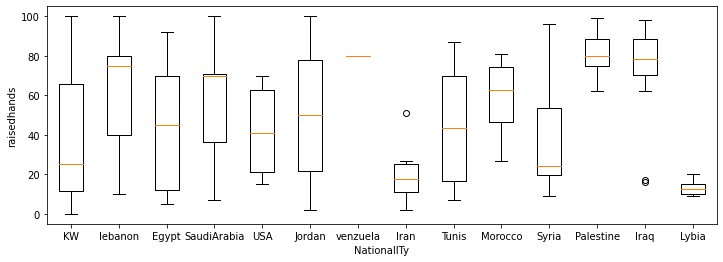

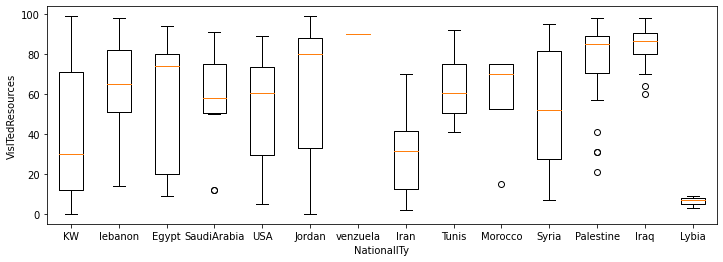

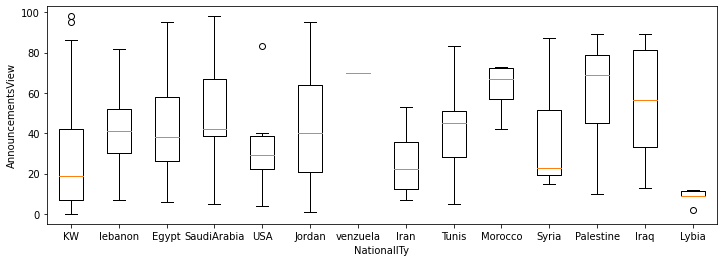

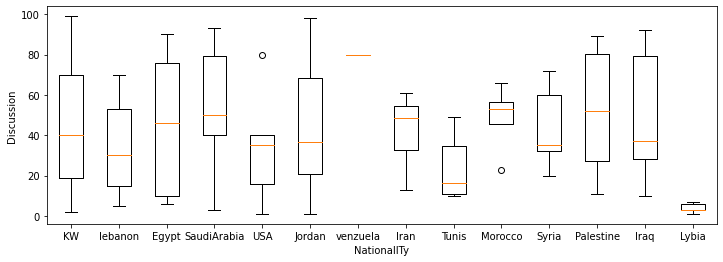

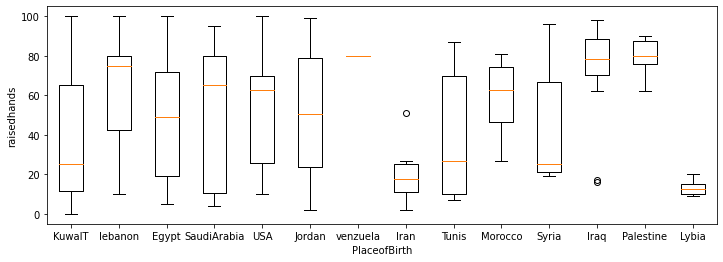

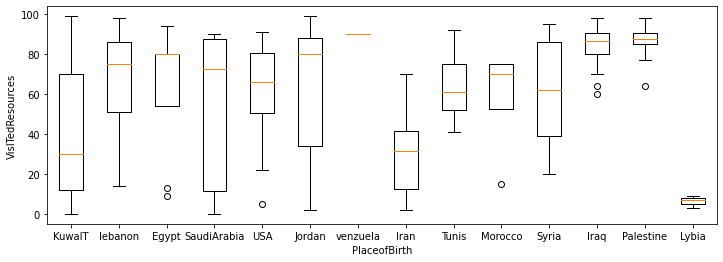

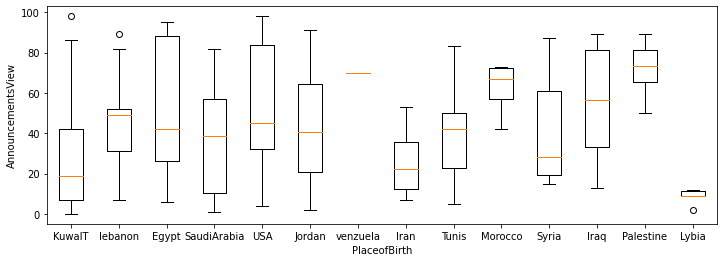

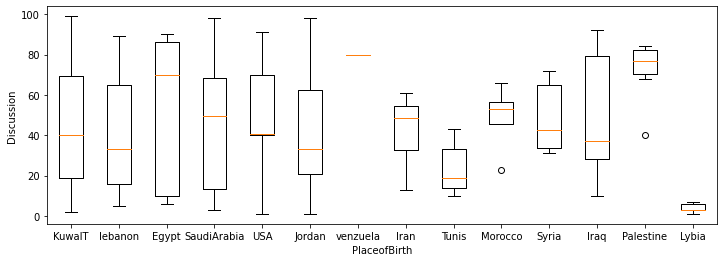

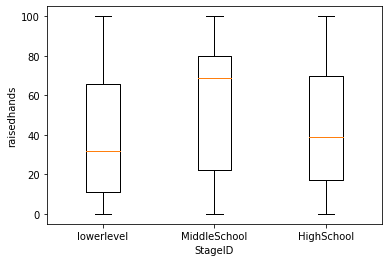

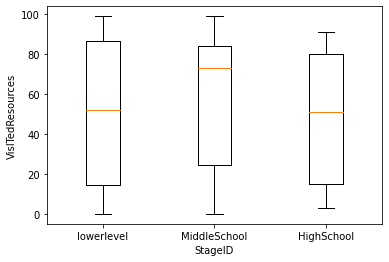

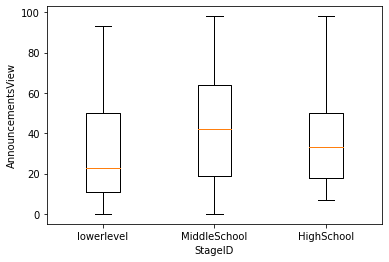

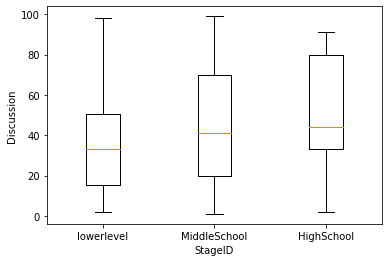

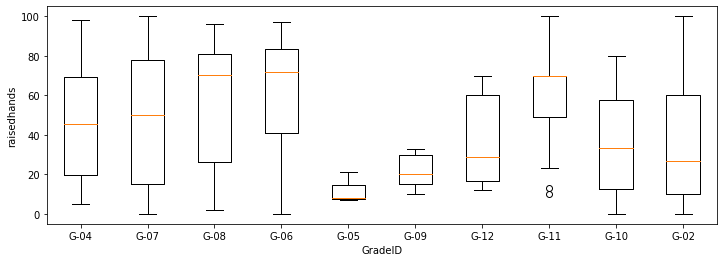

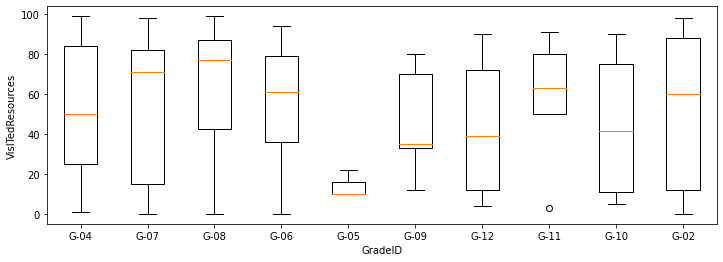

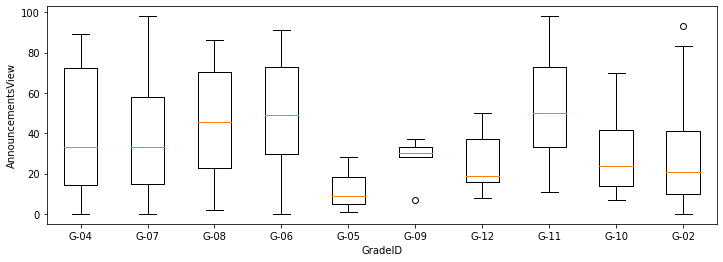

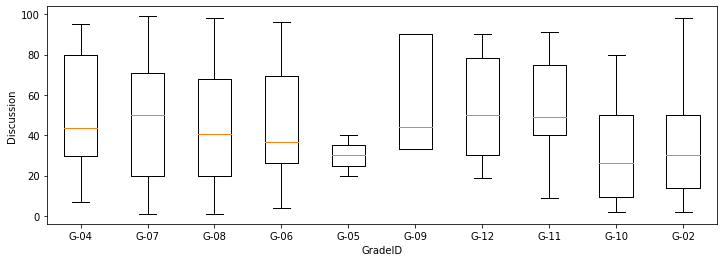

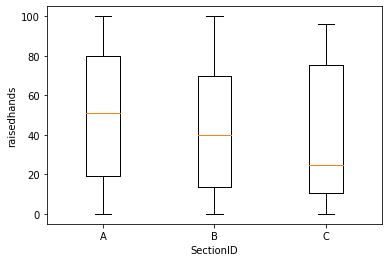

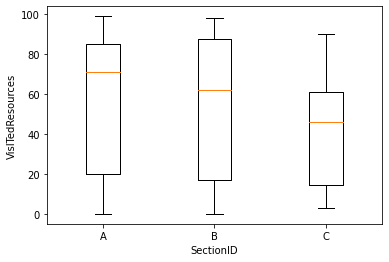

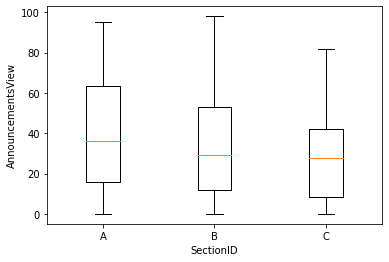

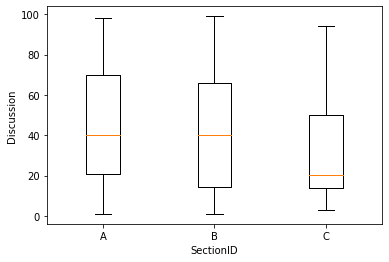

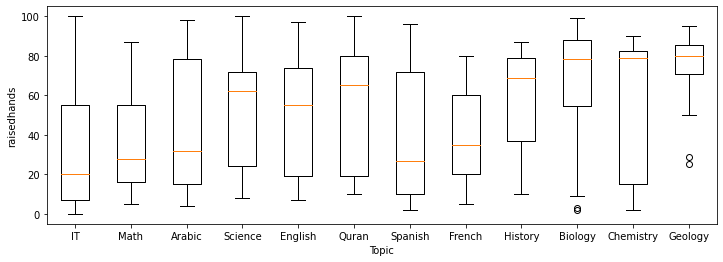

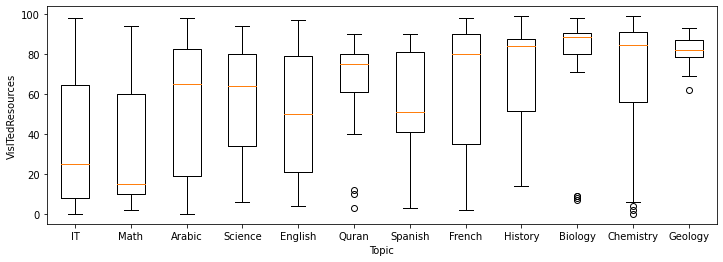

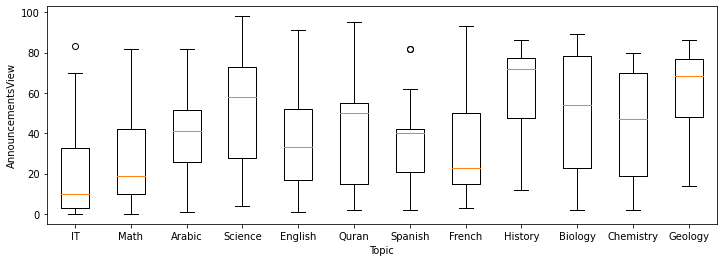

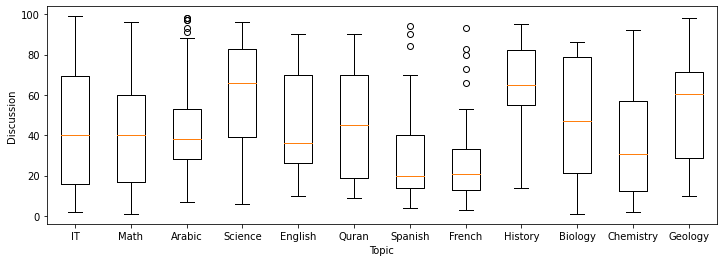

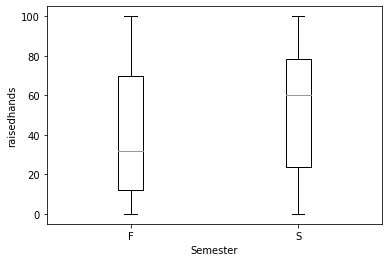

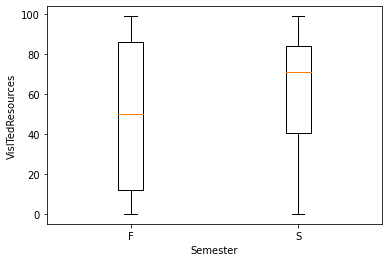

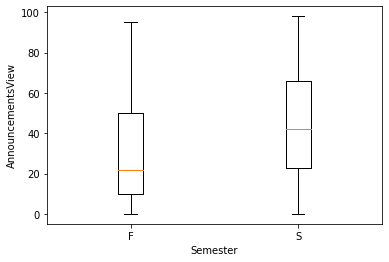

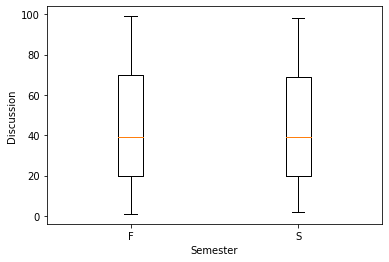

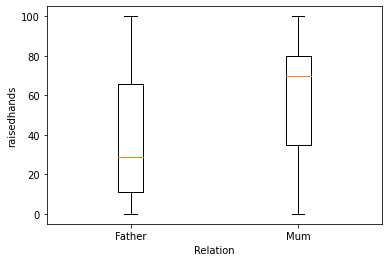

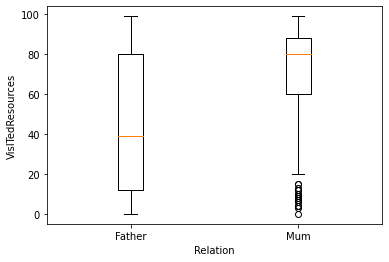

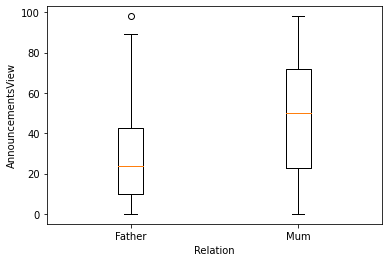

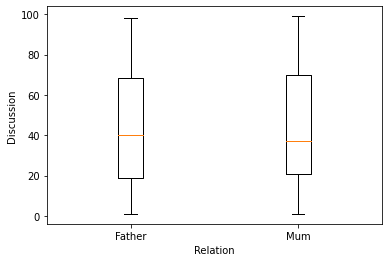

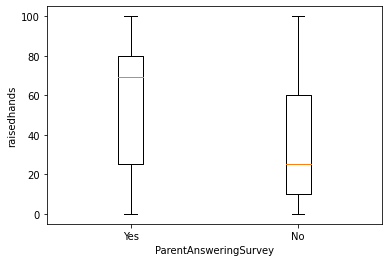

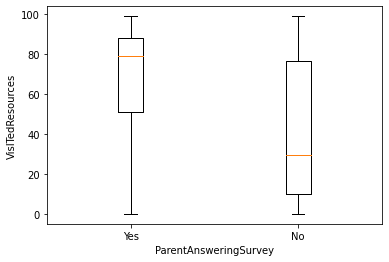

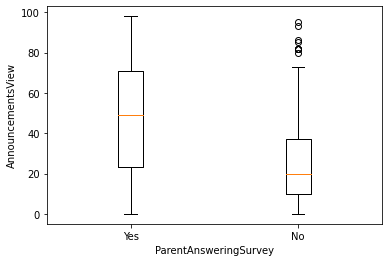

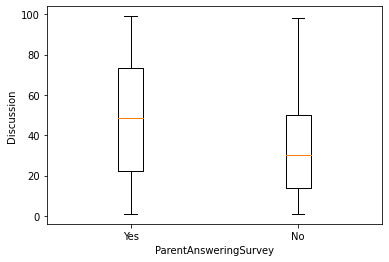

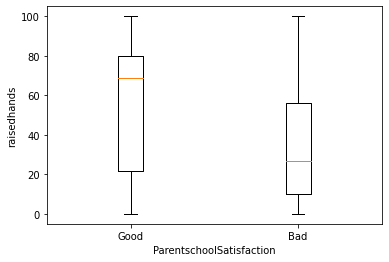

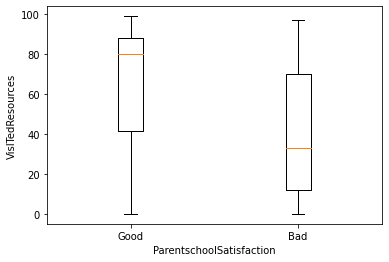

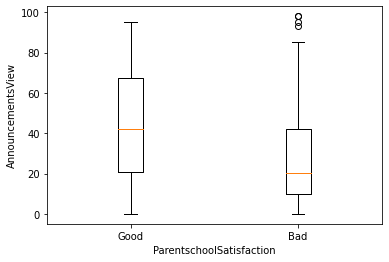

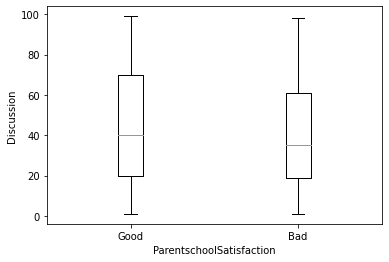

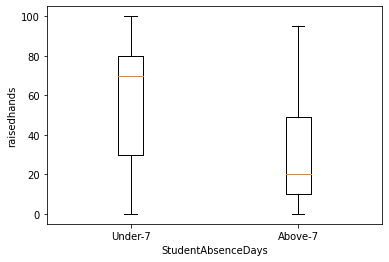

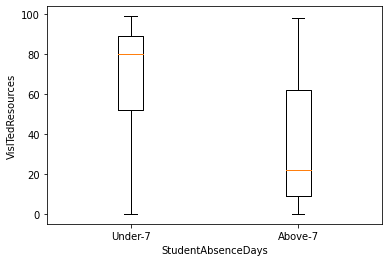

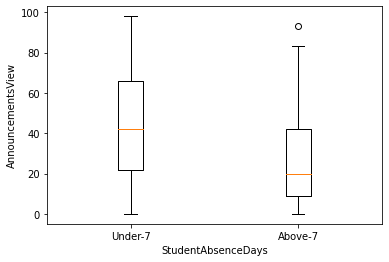

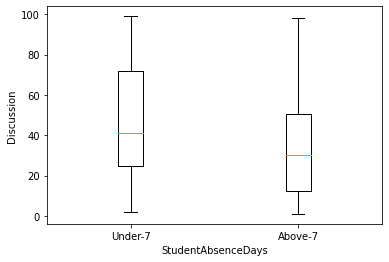

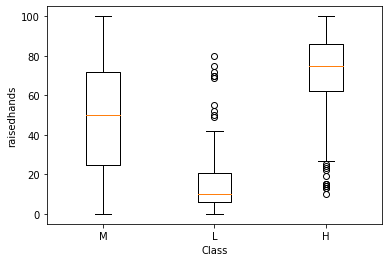

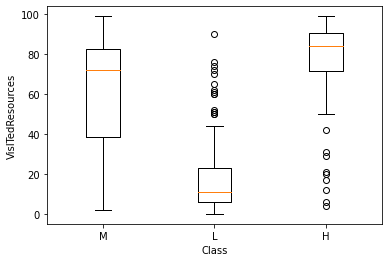

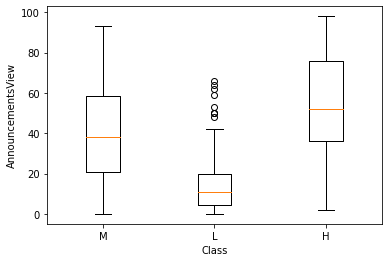

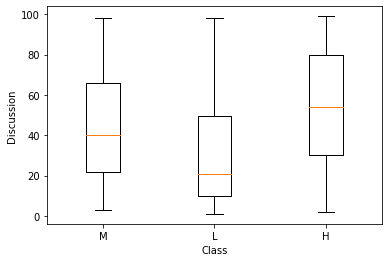

In [25]:
qual_data = stu_data.iloc[:, 0:9].join(stu_data.iloc[:, 13:18])
qual_data.head()

for i in range(qual_data.shape[1]):
    for j in range(num_data.shape[1]):
        boxplotter(qual_data.iloc[:, i], num_data.iloc[:, j], qual_data.columns[i], num_data.columns[j])

In [23]:
def contingency(x, y, y_name, x_name):
    # Find possible values for each of the two columns
    x_unique = set()
    y_unique = set()
    for item in x:
        x_unique.add(item)
        
    for item in y:
        y_unique.add(item)
    
    # Assign an integer to each possible non-numeric value
    x_labels = {}
    y_labels = {}
    for i, item in enumerate(x_unique):
        x_labels.update({item: i})
        
    for i, item in enumerate(y_unique):
        y_labels.update({item: i})
        
    # Create contingency table, add 1 to each dimension for the total column and row
    table = np.zeros([len(x_unique) + 1, len(y_unique) + 1])
    
    for row in zip(x, y):
        i = x_labels[row[0]]
        j = y_labels[row[1]]
        table[i][j] += 1
    
    # Sum up each row and column to fill in the remainder of the table
    for i in range(len(x_unique)):
        for j in range(len(y_unique)):
            # Update totals row and then totals column
            table[i][len(y_unique)] += table[i][j]
            table[len(x_unique)][j] += table[i][j]
            
            # Update global total (lower right cell in matrix)
            table[len(x_unique)][len(y_unique)] += table[i][j]
        
    # Plot table
    row_labels = list(x_labels)
    row_labels.append("Total")
    col_labels = list(y_labels)
    col_labels.append("Total")
    
    # Dataframe
    df = pd.DataFrame(table, index=row_labels, columns=col_labels)
    print(y_name, x_name)
    print(df, end='\n\n')
    
    save_path = 'Output/Tables/' + y_name + x_name +'.txt'
    
    f = open(save_path, 'w')
    f.write(df.to_latex())

In [11]:
for i in range(qual_data.shape[1]):
    for j in range(i + 1, qual_data.shape[1]):
        contingency(qual_data.iloc[:, i], qual_data.iloc[:, j], qual_data.columns[i], qual_data.columns[j])

gender NationalITy
       venzuela  Morocco     KW  Lybia  Palestine  Egypt  Tunis  Iraq  Syria  \
M           1.0      3.0  125.0    4.0       20.0    7.0   11.0  16.0    5.0   
F           0.0      1.0   54.0    2.0        8.0    2.0    1.0   6.0    2.0   
Total       1.0      4.0  179.0    6.0       28.0    9.0   12.0  22.0    7.0   

       Iran  lebanon  SaudiArabia  Jordan  USA  Total  
M       5.0      6.0          7.0    93.0  2.0  305.0  
F       1.0     11.0          4.0    79.0  4.0  175.0  
Total   6.0     17.0         11.0   172.0  6.0  480.0  

gender PlaceofBirth
       venzuela  Morocco  Lybia  Palestine  SaudiArabia  Egypt  Tunis  Iraq  \
M           1.0      3.0    4.0        6.0         13.0    6.0    9.0  16.0   
F           0.0      1.0    2.0        4.0          3.0    3.0    0.0   6.0   
Total       1.0      4.0    6.0       10.0         16.0    9.0    9.0  22.0   

       Syria  Iran  lebanon  KuwaIT  Jordan   USA  Total  
M        4.0   5.0      5.0   127.0    

PlaceofBirth StudentAbsenceDays
             Above-7  Under-7  Total
venzuela         0.0      1.0    1.0
Morocco          1.0      3.0    4.0
Lybia            6.0      0.0    6.0
Palestine        0.0     10.0   10.0
SaudiArabia      6.0     10.0   16.0
Egypt            4.0      5.0    9.0
Tunis            3.0      6.0    9.0
Iraq             6.0     16.0   22.0
Syria            2.0      4.0    6.0
Iran             4.0      2.0    6.0
lebanon          2.0     17.0   19.0
KuwaIT          82.0     98.0  180.0
Jordan          71.0    105.0  176.0
USA              4.0     12.0   16.0
Total          191.0    289.0  480.0

PlaceofBirth Class
                 M      L      H  Total
venzuela       0.0    0.0    1.0    1.0
Morocco        2.0    1.0    1.0    4.0
Lybia          0.0    6.0    0.0    6.0
Palestine      4.0    0.0    6.0   10.0
SaudiArabia    5.0    4.0    7.0   16.0
Egypt          3.0    3.0    3.0    9.0
Tunis          3.0    3.0    3.0    9.0
Iraq           8.0    0.0   14.0   2

ParentAnsweringSurvey ParentschoolSatisfaction
        Good    Bad  Total
No      65.0  145.0  210.0
Yes    227.0   43.0  270.0
Total  292.0  188.0  480.0

ParentAnsweringSurvey StudentAbsenceDays
       Above-7  Under-7  Total
No       114.0     96.0  210.0
Yes       77.0    193.0  270.0
Total    191.0    289.0  480.0

ParentAnsweringSurvey Class
           M      L      H  Total
No      83.0   99.0   28.0  210.0
Yes    128.0   28.0  114.0  270.0
Total  211.0  127.0  142.0  480.0

ParentschoolSatisfaction StudentAbsenceDays
       Above-7  Under-7  Total
Good      90.0    202.0  292.0
Bad      101.0     87.0  188.0
Total    191.0    289.0  480.0

ParentschoolSatisfaction Class
           M      L      H  Total
Good   131.0   43.0  118.0  292.0
Bad     80.0   84.0   24.0  188.0
Total  211.0  127.0  142.0  480.0

StudentAbsenceDays Class
             M      L      H  Total
Above-7   71.0  116.0    4.0  191.0
Under-7  140.0   11.0  138.0  289.0
Total    211.0  127.0  142.0  480.0

